In [78]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from helper_code import *
import plotly.express as px

In [79]:
columns_of_interest = ['age', 'educ2', 'web1a', 'web1b', 'web1c', 'sns2a', 'sns2b', 'sns2c']

In [80]:
# Load the data
data_2018 = pd.read_csv('datasets/Jan-25-Feb-8-2021-Core-Trends-Survey/Jan 25-Feb 8, 2021 - Core Trends Survey - CSV.csv')
data_2019 = pd.read_csv('datasets/January 3-10, 2018 - Core Trends Survey/January 3-10, 2018 - Core Trends Survey - CSV.csv')
data_2021 = pd.read_csv('datasets/January-8-February-7-2019-Core-Trends-Survey-SPSS/January 8-February 7, 2019 - Core Trends Survey - CSV.csv')

In [81]:
# Extract the relevant data
data_2018 = data_2018[columns_of_interest]
data_2019 = data_2019[columns_of_interest]
data_2021 = data_2021[columns_of_interest]

In [82]:
# Combine the data from different years
combined_data = pd.concat([data_2018, data_2019, data_2021])
print(combined_data[['educ2', 'sns2a']].dropna().head())
print(combined_data['educ2'].unique())
print(combined_data['sns2a'].unique())

   educ2 sns2a
0      4      
1      3      
2      4     3
3      8      
4      8      
[ 4  3  8  6  5  7 99  2  1 98]
[' ' '3' '2' '1' '4' '5' '8' '9']


In [83]:
# checking for the head to see if there are any Nans

# print(combined_data[['educ2', 'sns2a']].isnull().sum())
# combined_data['educ2'] = combined_data['educ2'].astype(str)
# combined_data['sns2a'] = combined_data['sns2a'].astype(str)

In [84]:
# Define age bins and labels
age_bins = [18, 24, 34, 44, 54, 64, 74, 84, 94, 104]
age_labels = ['18-23', '24-33', '34-43', '44-53', '54-63', '64-73', '74-83', '84-93', '94+']

In [85]:
combined_data['Age Group'] = pd.cut(combined_data['age'], bins=age_bins, labels=age_labels)

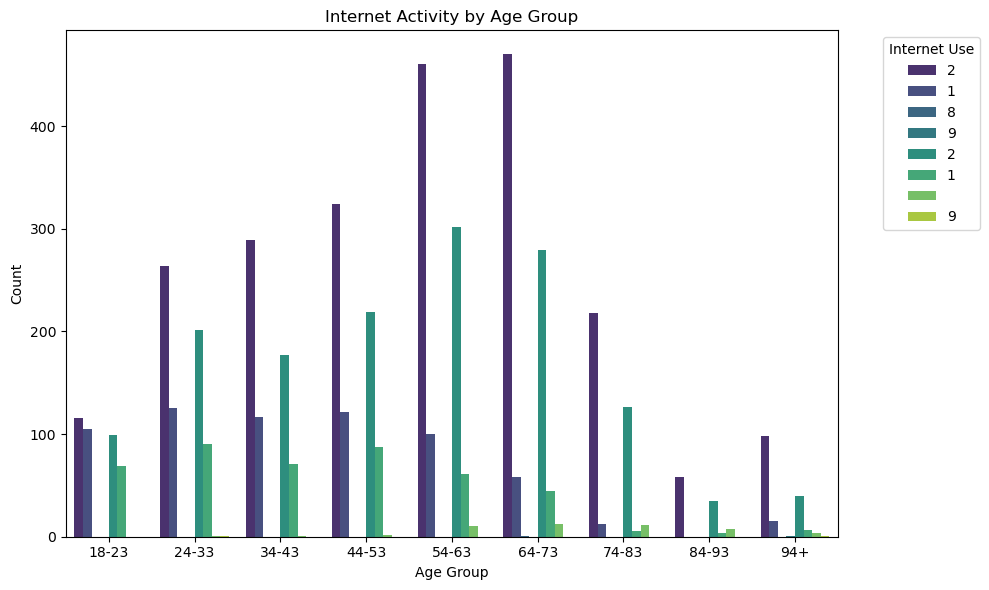

In [86]:
# Visualization: Age Group Technology Engagement
plt.figure(figsize=(10, 6))
sns.countplot(x='Age Group', hue='web1a', data=combined_data, palette='viridis')
plt.title('Internet Activity by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Internet Use', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [98]:
# # Visualization: Education Level and Technology Engagement
# plt.figure(figsize=(10, 6))
# sns.countplot(x='educ2', hue='sns2a', data=combined_data, palette='viridis')
# plt.title('Social Media Usage by Education Level')
# plt.xlabel('Education Level')
# plt.ylabel('Count')
# plt.legend(title='Social Media Use', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()
# plt.show()

education_level_mapping = {
    1: 'Less than HS diploma',
    2: 'High school graduate',
    3: 'Some college',
    4: 'Bachelor\'s degree',
    5: 'Post-graduate'
}
combined_data['Education Level'] = combined_data['educ2'].map(education_level_mapping)

# Mapping for social media usage categories to scores
social_media_usage_mapping = {
    1: 'Never',
    2: 'Rarely',
    3: 'Occasionally',
    4: 'Frequently',
    5: 'Always'
}
social_media_usage_scores = {
    'Never': 1,
    'Rarely': 2,
    'Occasionally': 3,
    'Frequently': 4,
    'Always': 5
}
# combined_data['Social Media Usage'] = combined_data['sns2a'].map(social_media_usage_mapping)
# combined_data['Social Media Usage Score'] = combined_data['Social Media Usage'].map(social_media_usage_scores)

# Calculate the average social media usage score by education level
# average_usage_by_education = combined_data.groupby('Education Level')['Social Media Usage Score'].mean().reset_index()

# Create a bar plot with the average social media usage score by education level
# plt.figure(figsize=(10, 6))
# sns.countplot(x='educ2', data=combined_data)
# plt.title('Check Data Rendering')
# plt.xlabel('Education Level')
# plt.show()

# Ensure the keys of the mapping match the data type in 'educ2'
print("Unique values in 'educ2' before mapping:", combined_data['educ2'].unique())
combined_data['Education Level'] = combined_data['educ2'].map(education_level_mapping)
print("Mapped education levels:", combined_data['Education Level'].unique())

# Exclude placeholder or outlier values if they exist and are not meaningful
filtered_combined_data = combined_data[combined_data['educ2'].isin(education_level_mapping.keys())]
print("Data after filtering:", filtered_combined_data['Education Level'].value_counts())

# Apply the social media usage mapping
combined_data['Social Media Usage'] = combined_data['sns2a'].map(social_media_usage_mapping)
print("Mapped social media usage:", combined_data['Social Media Usage'].unique())

# Convert social media usage to numerical scores
combined_data['Social Media Usage Score'] = combined_data['Social Media Usage'].map(social_media_usage_scores)
print("Social media usage scores:", combined_data['Social Media Usage Score'].unique())

# Check if any NaN values are present after mapping
print("NaN counts after mapping:", combined_data.isnull().sum())

# Calculate the average social media usage score by education level
average_usage_by_education = filtered_combined_data.groupby('Education Level')['Social Media Usage Score'].mean().reset_index()
print("Average usage by education level:", average_usage_by_education)


# Check the unique values in the 'sns2a' column
print("Unique values in 'sns2a':", combined_data['sns2a'].unique())

# Assuming the mappings are defined as before
# Apply the mapping for social media usage
combined_data['Social Media Usage'] = combined_data['sns2a'].map(social_media_usage_mapping)

# Check if there are any NaNs after the mapping and the unique values of 'Social Media Usage'
print("Mapped social media usage with NaNs:", combined_data['Social Media Usage'].unique())
print("NaNs in 'Social Media Usage':", combined_data['Social Media Usage'].isna().sum())

# Apply the scores mapping only to the non-NaN values
combined_data['Social Media Usage Score'] = combined_data['Social Media Usage'].dropna().map(social_media_usage_scores)

# Recalculate the average social media usage score by education level, excluding NaN scores
average_usage_by_education = (
    combined_data.dropna(subset=['Social Media Usage Score'])
    .groupby('Education Level')['Social Media Usage Score']
    .mean()
    .reset_index()
)

# Verify that average_usage_by_education has data
print("Average usage by education level:", average_usage_by_education)

# If average_usage_by_education is not empty, plot the graph
if not average_usage_by_education.empty:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Education Level', y='Social Media Usage Score', data=average_usage_by_education, palette='viridis')
    plt.title('Average Social Media Usage by Education Level')
    plt.xlabel('Education Level')
    plt.ylabel('Average Social Media Usage Score')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No data to plot.")

Unique values in 'educ2' before mapping: [4 3 5 2 1]
Mapped education levels: ["Bachelor's degree" 'Some college' 'Post-graduate' 'High school graduate'
 'Less than HS diploma']
Data after filtering: Education Level
Some college            1111
Bachelor's degree        779
Post-graduate            524
High school graduate     227
Less than HS diploma     121
Name: count, dtype: int64
Mapped social media usage: [nan]
Social media usage scores: [nan]
NaN counts after mapping: age                            0
educ2                          0
web1a                          0
web1b                          0
web1c                          0
sns2a                          0
sns2b                          0
sns2c                          0
Age Group                     81
Education Level                0
Social Media Usage          2762
Social Media Usage Score    2762
dtype: int64
Average usage by education level:         Education Level  Social Media Usage Score
0     Bachelor's degree     